### Khai báo thư viện Pandas

In [1]:
import pandas as pd

### Đọc dữ liệu từ file csv

In [2]:
data = pd.read_csv("D:/Phân tích dữ liệu với Python/subset-covid-data.csv", encoding = "UTF-8")
data.head()

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0


### Tìm hiểu cấu trúc bộ dữ liệu

In [3]:
# Số lượng dòng, cột và datatype từng cột
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


### Giải đáp một số thắc mắc

In [4]:
# Tìm hiểu dữ liệu được thống kê cho những ngày nào
data.date.value_counts()

2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: date, dtype: int64

In [6]:
# Lọc dữ liệu nhiễu
cleaned_data = data[data.date == "2020-04-12"]

In [7]:
print(f"Trung bình số ca mắc mới: {cleaned_data.cases.mean()}")

Trung bình số ca mắc mới: 376.8186274509804


In [8]:
print(f"Trung vị của số ca mắc mới: {cleaned_data.cases.median()}")

Trung vị của số ca mắc mới: 11.5


### Vẽ biểu đồ phân bố số lượng ca mắc mới ở các quốc gia

In [9]:
import matplotlib.pyplot as plt

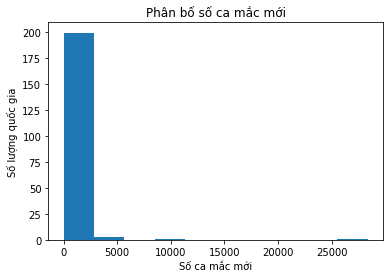

In [10]:
plt.hist(cleaned_data.cases);
plt.title("Phân bố số ca mắc mới");
plt.xlabel("Số ca mắc mới");
plt.ylabel("Số lượng quốc gia");

In [11]:
print("Tổng số ca nhiễm và số ca ncủa các châu lục")
cleaned_data.groupby('continent')[['cases','deaths']].sum()

Tổng số ca nhiễm và số ca ncủa các châu lục


,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,29591,2966
Oceania,68,4


In [12]:
print ("5 quốc gia có số ca nhiễm mới cao nhất")
data = data.sort_values('cases', ascending = False)
data.head(5)

5 quốc gia có số ca nhiễm mới cao nhất


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
190,Turkey,Asia,2020-04-12,12,4,2020,5138,95,TUR,82319724.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0


In [13]:
print ("5 quốc gia có số ca tử vong cao nhất")
data = data.sort_values('deaths', ascending = False)
data.head(5)

5 quốc gia có số ca tử vong cao nhất


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0
